# Lab 6: Logistic Regression & PyTorch for Deep Learning

## A: [*Logistic regression* ](#partA); B: [*Linear Regression with PyTorch NN*](#partB)

[**Haiping Lu**](http://staffwww.dcs.shef.ac.uk/people/H.Lu/) -  [COM4509/6509 MLAI2020](https://github.com/maalvarezl/MLAI) @ The University of Sheffield

**Sources**: Part A is based on the [one neuron](https://github.com/cbernet/maldives/tree/master/one_neuron) notebooks by  [Colin Bernet](https://github.com/cbernet). Part B is based on the [PyTorch tutorial from CSE446, University of Washington](https://courses.cs.washington.edu/courses/cse446/18wi/sections/section7/446_pytorch_tutorial.html) and Lab 1 of my [SimplyDeep](https://github.com/haipinglu/SimplyDeep/)  notebooks.

**Note**: Try to answer questions when you first see them rather than coming back after going through the rest.

# <a id='partA'></a>A: Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## A1. The sigmoid function 

The **sigmoid** or **logistic function** is essential in binary classification problems. It is expressed as
$$\sigma(z) = \frac{1}{1+e^{-z}}$$
and here is what it looks like in 1D:

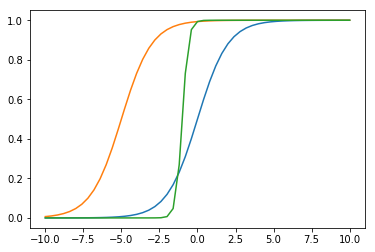

In [2]:
# define parameters
# the bias: 
b = 0
# the weight: 
w = 1

def sigmoid(x1):
    # z is a linear function of x1
    z = w*x1 + b
    return 1 / (1+np.exp(-z))

# create an array of evenly spaced values
linx = np.linspace(-10,10,51)
plt.plot(linx, sigmoid(linx))
b=5
plt.plot(linx, sigmoid(linx))
w=5
plt.plot(linx, sigmoid(linx))

---
### Question 1

What are the parameters (w and b) for each of the three curves orange (left), green (middle) and blue (right)?

**Answer**: 

Left (blue): w=1, b=5

Middle (green): w=5, b=0

Right (orange): w=1,b=0

---


Let's look at this function in more details:

* when $z$ goes to infinity, $e^{-z}$ goes to zero, and $\sigma (z)$ goes to one.
* when $z$ goes to minus infinity, $e^{-z}$ goes to infinity, and $\sigma (z)$ goes to zero.
* $\sigma(0) = 0.5$, since $e^0=1$.

It is important to note that the sigmoid is bound between 0 and 1, like a probability. And actually, in binary classification problems, the probability for an example to belong to a given category is produced by a sigmoid function. To classify our examples, we can simply use the output of the sigmoid: A given unknown example with value $x$ will be classified to category 1 if $\sigma(z) > 0.5$, and to category 0 otherwise. 

**Excercise**: Now you can go back to the cell above, and play a bit with the `b` and `w` parameters, redoing the plot everytime you change one of these parameters. 

* $b$ is the **bias**. Changing the bias simply moves the sigmoid along the horizontal axis. For example, if you choose $b=1$ and $w=1$, then $z = wx + b = 0$ at $x=-1$, and that's where the sigmoid will be equal to 0.5
* $w$ is the **weight** of variable $x$. If you increase it, the sigmoid evolves faster as a function of $x$ and gets sharper.

## A2. Logistic regression as the simplest neural network

We will build the simplest neural network to classify our examples:

* Each example has one variable, so we need 1 input node on the input layer
* We're not going to use any hidden layer, as that would complicate the network 
* We have two categories, so the output of the network should be a single value between 0 and 1, which is the estimated probability $p$ for an example to belong to category 1. Then, the probability to belong to category 0 is simply $1-p$. Therefore, we should have a single output neuron, the only neuron in the network.

The sigmoid function can be used in the output neuron. Indeed, it spits out a value between 0 and 1, and can be used as a classification probability as we have seen in the previous section.

We can represent our network in the following way:

![Neural network with 1 neuron](https://github.com/cbernet/maldives/raw/master/images/one_neuron.png)

In the output neuron: 

* the first box performs a change of variable and computes the **weighted input** $z$ of the neuron
* the second box applies the **activation function** to the weighted input. Here, we choose the sigmoid $\sigma (z) = 1/(1+e^{-z})$ as an activation function

This simple network has only 2 tunable parameters, the weight $w$ and the bias $b$, both used in the first box. We see in particular that when the bias is very large, the neuron will **always be activated**, whatever the input. On the contrary, for very negative biases, the neuron is **dead**. 

We can write the output simply as a function of $x$, 

$$f(x) = \sigma(z) = \sigma(wx+b)$$
This is exactly the **logistic regression** classifier.

---
### Question 2

How can we rewrit the logistic regression classifier above using a **single vectorial parameter** (i.e. one vector containing all parameters)?

**Answer**: 

Assuming w is a (1xn) row vector, then by creating an extra column in the the w, called wbias, 
then we will have, e.g. w=[w1 w2 wbias] and append an extra row into x ( our feature vector) and set it to 1, e.g. to be x= [x1; x2; 1].
 
--- 

## A3. Classifying 2D dataset with logistic regression

Let's create a sample of examples with two values x1 and x2, with two categories. 
For category 0, the underlying probability distribution is a 2D Gaussian centered on (0,0), with width = 1 along both directions. For category 1, the Gaussian is centered on (2,2). We assign label 0 to category 0, and label 1 to category 1.

### Dataset creation

Let's create a sample of examples with two values x1 and x2, with two categories. 
For category 0, the underlying probability distribution is a 2D Gaussian centered on (0,0), with width = 1 along both directions. For category 1, the Gaussian is centered on (2,2). We assign label 0 to category 0, and label 1 to category 1. Check out the [documentation for Gaussian data generation](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.multivariate_normal.html)

In [3]:
normal = np.random.multivariate_normal
# Number of samples 
nSamples = 500
# (unit) variance:
s2 = 1
# below, we provide the coordinates of the mean as 
# a first argument, and then the covariance matrix
# we generate nexamples examples for each category
sgx0 = normal([0.,0.], [[s2, 0.], [0.,s2]], nSamples)
sgx1 = normal([2.,2.], [[s2, 0.], [0.,s2]], nSamples)
# setting the labels for each category
sgy0 = np.zeros((nSamples,))
sgy1 = np.ones((nSamples,))

Here is a scatter plot for the examples in the two categories

Text(0, 0.5, 'x2')

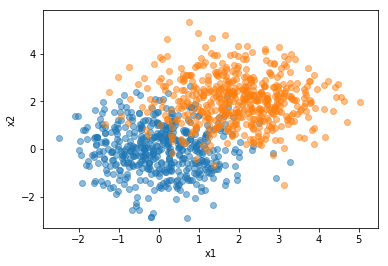

In [4]:
plt.scatter(sgx0[:,0], sgx0[:,1], alpha=0.5)
plt.scatter(sgx1[:,0], sgx1[:,1], alpha=0.5)
plt.xlabel('x1')
plt.ylabel('x2')

Our goal is to train a logistic regression to classify (x1,x2) points in one of the two categories depending on the values of x1 and x2. We form the dataset by concatenating the arrays of points, and also the arrays of labels for later use:

In [5]:
sgx = np.concatenate((sgx0, sgx1))
sgy = np.concatenate((sgy0, sgy1))

print(sgx.shape[1], sgy.shape[0])

2 1000


### 2D sigmoid

In 2D, the expression of the sigmoid remains the same, but $z$ is now a function of the two variables $x_1$ and $x_2$, 

$$z=w_1 x_1 + w_2 x_2 + b$$

And here is the code for the **2D sigmoid** and the defined function is called **sigmoid_2d**:

In [6]:
# define parameters
# bias: 
b = 0
# x1 weight: 
w1 = 1
# x2 weight:
w2 = 2

def sigmoid_2d(x1, x2):
    # z is a linear function of x1 and x2
    z = w1*x1 + w2*x2 + b
    return 1 / (1+np.exp(-z))

To see what this function looks like, we can make a 2D plot, with x1 on the horizontal axis, x2 on the vertical axis, and the value of the sigmoid represented as a color for each (x1, x2) coordinate. To do that, we will create an array of evenly spaced values along x1, and another array along x2. Taken together, these arrays will allow us to map the (x1,x2) plane. 

In [7]:
xmin, xmax, npoints = (-6,6,51)
linx1 = np.linspace(xmin,xmax,npoints)
# no need for a new array, we just reuse the one we have with another name: 
linx2 = linx1

Then, we create a **meshgrid** from these arrays: 

In [8]:
gridx1, gridx2 = np.meshgrid(np.linspace(xmin,xmax,npoints), np.linspace(xmin,xmax,npoints))
print(gridx1.shape, gridx2.shape)
print('gridx1:')
print(gridx1) 
print('gridx2')
print(gridx2)

(51, 51) (51, 51)
gridx1:
[[-6.   -5.76 -5.52 ...  5.52  5.76  6.  ]
 [-6.   -5.76 -5.52 ...  5.52  5.76  6.  ]
 [-6.   -5.76 -5.52 ...  5.52  5.76  6.  ]
 ...
 [-6.   -5.76 -5.52 ...  5.52  5.76  6.  ]
 [-6.   -5.76 -5.52 ...  5.52  5.76  6.  ]
 [-6.   -5.76 -5.52 ...  5.52  5.76  6.  ]]
gridx2
[[-6.   -6.   -6.   ... -6.   -6.   -6.  ]
 [-5.76 -5.76 -5.76 ... -5.76 -5.76 -5.76]
 [-5.52 -5.52 -5.52 ... -5.52 -5.52 -5.52]
 ...
 [ 5.52  5.52  5.52 ...  5.52  5.52  5.52]
 [ 5.76  5.76  5.76 ...  5.76  5.76  5.76]
 [ 6.    6.    6.   ...  6.    6.    6.  ]]


if you take the first line in both arrays, and scan the values on this line, you get: `(-6,-6), (-5.76, -6), (-5.52, -6)`... So we are scanning the x1 coordinates sequentially at the bottom of the plot. If you take the second line, you get: `(-6, -5.76), (-5.76, -5.76), (-5.52, -5.76)` ... : we are scanning the second line at the bottom of the plot, after moving up in x2 from one step. 

Scanning the full grid, you would scan the whole plot sequentially. 

Now we need to compute the value of the sigmoid for each pair (x1,x2) in the grid using the **sigmoid_2d** function defined above (cell 6). That's very easy to do with the output of `meshgrid`: 

In [9]:
z = sigmoid_2d(gridx1, gridx2)
z.shape

(51, 51)

This calls the `sigmoid_2d` function to each pair `(x1,y2)` taken from the `gridx1` and `gridx2` arrays so that we can plot our sigmoid in 2D: 

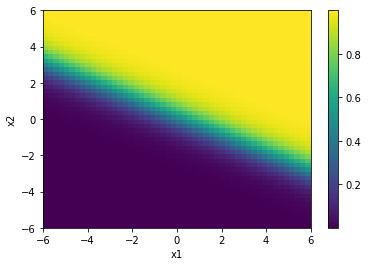

In [10]:
plt.pcolor(gridx1, gridx2, z)
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar()

The 2D sigmoid has the same kind of rising edge as the 1D sigmoid, but in 2D. 
With the parameters defined above: 

* The **weight** of $x_2$ is twice larger than the weight of $x_1$, so the sigmoid evolves twice faster as a function of $x_2$. 
* The separation boundary, which occurs for $z=0$, is a straight line with equation $w_1 x_1 + w_2 x_2 + b = 0$. Or equivalently: 

$$x_2 = -\frac{w_1}{w_2} x_1 - \frac{b}{w_2} = -0.5 x_1$$

---
### Question 3

If you set one of the weights to zero, what will happen? Also, verify on the plot above that the equation above is indeed the one describing the separation boundary. 

**Answer**: 

If we set w2 (w1) to zero then this sigmoid will be a 1D sigmoid of x1 (x2).

The equation above describes a straight line $x_2=-\frac{1}{2}x_1$, which is a straight line passing the origin (0,0) with a slope of $-\frac{1}{2}$ that can be verified on the figure.

---

Now you can test by editing the function `sigmoid_2d`, before re-executing the above cells. 

Note that if you prefer, you can plot the sigmoid in 3D like this:  

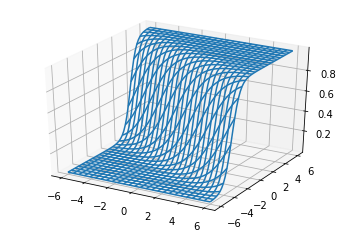

In [11]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(gridx1,gridx2,z)

**Exercise**: change the parameters to observe how the 2D sigmoid changes.

### Logistic regression on the 2D data

Let's now train a logistic regression to separate the two classes of examples. The goal of the training will be to use the existing examples to find the optimal values for the parameters $w_1, w_2, b$. 

We take the logistic regression algorithm from scikit-learn. 
Here, the logistic regression is used with the `lbfgs` solver. LBFGS is the minimization method used to find the best parameters. It is similar to [Newton's method](https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization). Since there is randomness, setting a seed is a good practice for **reproducibility**.

In [12]:
from sklearn.linear_model import LogisticRegression
np.random.seed(2020) #set a seed for reproducibility
clf = LogisticRegression(solver='lbfgs')  #clf: classifier
clf.fit(sgx, sgy)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

Note from the above that the default setting for logistic regression in scikit-learn uses L2 regularisation (penalty). 

---
### Question 4

What is the objective of L2 regularisation (penalty)? *Hint*: this is not covered in lecture and you need to do some study (search).

**Answer**: 
This penalty term limits (penalises) the magnitude of the optimal weights from growing too large, typically to avoid overfitting by preferring a simpler model. See [Regularization for Simplicity: L₂ Regularization](https://developers.google.com/machine-learning/crash-course/regularization-for-simplicity/l2-regularization).

---

Check out the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) to learn other options for penalty (regularisation) and other settings. In the simplest form, logistic regression does not have any hyperparameters but in practice, regularisation is often used, e.g. to reduce [overfitting](https://en.wikipedia.org/wiki/Overfitting).

The logistic regression has been fitted (trained) to the data. Now, we can use it to predict the probability for any given (x1,x2) point to belong to category 1.

We would like to plot this probability in 2D as a function of x1 and x2. To do that, we need to use the `clf.predict_proba` method which takes a 2D array of shape `(n_points, 2)`. The first dimension indexes the points, and the second one contains the values of x1 and x2. Again, we use our grid to map the (x1,x2) plane. But the gridx1 and gridx2 arrays defined above contain disconnected values of x1 and x2: 

In [13]:
print(gridx1.shape, gridx2.shape)

(51, 51) (51, 51)


What we want is a 2D array of shape `(n_points, 2)`, not two 2D arrays of shape (51, 51)... 
So we need to **reshape** these arrays. First, we will **flatten** the gridx1 and gridx2 arrays so that all their values appear sequentially in a 1D array. Here is a small example to show how flatten works: 

In [14]:
a = np.array([[0, 1], [2, 3]])
print(a) 
print('flat array:', a.flatten())

[[0 1]
 [2 3]]
flat array: [0 1 2 3]


Then, we will stitch the two 1D arrays together in two columns with np.c_ like this: 

In [15]:
b = np.array([[4, 5], [6, 7]])
print(a.flatten())
print(b.flatten())
c = np.c_[a.flatten(), b.flatten()]
print(c)
print(c.shape)

[0 1 2 3]
[4 5 6 7]
[[0 4]
 [1 5]
 [2 6]
 [3 7]]
(4, 2)


This array has exactly the shape expected by `clf.predict_proba`: a list of samples with two values. So let's do the same with our meshgrid, and let's compute the probabilities for all (x1,x2) pairs in the grid:

In [16]:
grid = np.c_[gridx1.flatten(), gridx2.flatten()]
prob = clf.predict_proba(grid)
prob.shape

(2601, 2)

Now, prob does not have the right shape to be plotted. Below, we will use a gridx1 and a gridx2 array with shapes (51,51). The shape of the prob array must also be (51,51), as the plotting method will simply map each (x1,x2) pair to a probability. So we need to **reshape** our probability array to shape (51,51). Reshaping works like this:

In [17]:
d = np.array([0,1,2,3])
print(d)
print('reshaped to (2,2):')
print(d.reshape(2,2))

[0 1 2 3]
reshaped to (2,2):
[[0 1]
 [2 3]]


Finally (!) we can do our plot:

Text(0, 0.5, 'x2')

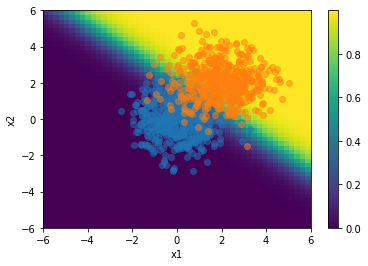

In [18]:
# note that prob[:,1] returns, for all exemples, the probability p to belong to category 1. 
# prob[:,0] would return the probability to belong to category 0 (which is 1-p)
plt.pcolor(gridx1,gridx2,prob[:,1].reshape(npoints,npoints))
plt.colorbar()
plt.scatter(sgx0[:,0], sgx0[:,1], alpha=0.5)
plt.scatter(sgx1[:,0], sgx1[:,1], alpha=0.5)
plt.xlabel('x1')
plt.ylabel('x2')

We see that the logistic regression is able to separate these two classes well and the decision boundary is **linear**.

# <a id='partB'></a>B: Linear Regression with PyTorch NN

## Objective

* To perform linear regression using PyTorch for understanding the link between linear models and neural networks.

**Suggested reading**: 
* What is PyTorch from [PyTorch tutorial](https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py)

#### Assumptions: basic python programming and [Anaconda](https://anaconda.org/) installed.



## Why

[Linear regression](https://en.wikipedia.org/wiki/Linear_regression) is a fundamental problem in statistics and machine learning. Using PyTorch, a deep learing library, to do linear regression will help bridge simple linear models with complex neural networks.

## B1. PyTorch Installation and Basics

### Install-1: direct installation (e.g., on your own machine with full installation right)

#### Install [PyTorch](https://github.com/pytorch/pytorch) via [Anaconda](https://anaconda.org/)
`conda install -c pytorch pytorch`

When you are asked whether to proceed, say `y`

#### Install [torchvision](https://github.com/pytorch/vision)
`conda install -c pytorch torchvision`

When you are asked whether to proceed, say `y`

### Install-2: Set up Anaconda Python environment (e.g., on a university desktop)

On a university desktop, you may not have permission to install new packages on the main environment of Anaconda. Please follow the instructions below to set up a new environment. This is also recommended if you have different python projects running that may require different environments.

Open a command line terminal.

**Create a new conda environment with Python 3.6**<br>
`conda create -n mlai20 python=3.6 anaconda`

**Activate the conda environment `mlai20`**<br>
`activate mlai20` (Windows)<br>
`source activate mlai20` (Mac/Linux)<br>
You will see `(mlai20)` on the left indciating your environment

**Install Pytorch and Torchvision** (non-CUDA/GPU version for simplicity)<br>
`conda install pytorch torchvision cpuonly -c pytorch`<br>
If you have GPU, install the GPU version with command at [here](https://pytorch.org/)

**Start Jupyter notebook server**: `jupyter notebook`

### Tensor
Optional: Go over the first two modules of [PyTorch tutorial](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html), *What is PyTorch* and *Autograd*

`torch.Tensor` is 
a multidimensional array data structure (array). You may check out the full list of [tensor types](http://pytorch.org/docs/master/tensors.html) and various [tensor operations](https://pytorch.org/docs/stable/torch.html).


### Computational Graph
A computation graph defines/visualises a sequence of operations to go from input to model output. 

Consider a linear regression model $\hat y = Wx + b$, where $x$ is our input, $W$ is a weight matrix, $b$ is a bias, and $\hat y$ is the predicted output. As a computation graph, this looks like:

![Linear Regression Computation Graph](https://imgur.com/IcBhTjS.png)

PyTorch dynamically build the computational graph, for example
![DynamicGraph.gif](https://raw.githubusercontent.com/pytorch/pytorch/master/docs/source/_static/img/dynamic_graph.gif)

## B2. Linear Regression using PyTorch `nn` module

Let us start right away with implementing linear regression in PyTorch to study PyTorch concepts closely. This part follows the [PyTorch Linear regression example](https://github.com/pytorch/examples/tree/master/regression) that trains a **single fully-connected layer** to fit a 4th degree polynomial.

### A synthetic linear regression problem

* Generate model parameters, weight and bias. The weight vector and bias are both tensors, 1D and 0D, respectively. We set a seed (2020) for **reproducibility**.

In [19]:
import torch
import torch.nn.functional as F

torch.manual_seed(2020) # For reproducibility

POLY_DEGREE = 4
W_target = torch.randn(POLY_DEGREE, 1) * 5
b_target = torch.randn(1) * 5

In [20]:
print(W_target)
print(b_target)

tensor([[ 6.1861],
        [-4.8020],
        [ 7.7076],
        [-2.0393]])
tensor([4.4029])


* Next, define a number of functions to generate the input (variables) and output (target/response). 

In [21]:
def make_features(x):
    """Builds features i.e. a matrix with columns [x, x^2, x^3, x^4]."""
    x = x.unsqueeze(1)
    return torch.cat([x ** i for i in range(1, POLY_DEGREE+1)], 1)

def f(x):
    """Approximated function."""
    return x.mm(W_target) + b_target.item()

def poly_desc(W, b):
    """Creates a string description of a polynomial."""
    result = 'y = '
    for i, w in enumerate(W):
        result += '{:+.2f} x^{} '.format(w, len(W) - i)
    result += '{:+.2f}'.format(b[0])
    return result

def get_batch(batch_size=32):
    """Builds a batch i.e. (x, f(x)) pair."""
    random = torch.randn(batch_size)
    x = make_features(random)
    y = f(x)
    return x, y

* Define a simple(st) neural network, which is a **single fully connected** (**FC**) layer. See [`torch.nn.Linear`](https://pytorch.org/docs/master/nn.html#torch.nn.Linear)

In [22]:
fc = torch.nn.Linear(W_target.size(0), 1)
print(fc)

Linear(in_features=4, out_features=1, bias=True)


    This is a *network* with four input units, one output unit, with a bias term.
    
* Now generate the data. Let us try to get five pairs of (x,y) first to inspect.


In [23]:
sample_x, sample_y = get_batch(5)
print(sample_x)
print(sample_y)

tensor([[ 5.2932e-02,  2.8018e-03,  1.4831e-04,  7.8502e-06],
        [-2.9589e-02,  8.7553e-04, -2.5907e-05,  7.6656e-07],
        [ 2.1718e-01,  4.7169e-02,  1.0244e-02,  2.2249e-03],
        [ 2.7703e-01,  7.6746e-02,  2.1261e-02,  5.8899e-03],
        [ 3.2963e-01,  1.0866e-01,  3.5817e-02,  1.1806e-02]])
tensor([[4.7180],
        [4.2154],
        [5.5943],
        [5.9000],
        [6.1723]])


    Take a look at the FC layer weights (randomly initialised)

In [24]:
print(fc.weight)

Parameter containing:
tensor([[ 0.2781, -0.0034,  0.3888,  0.0570]], requires_grad=True)


    Reset the gradients to zero, perform a forward pass to get prediction, and compute the loss

In [25]:
fc.zero_grad()
output = F.smooth_l1_loss(fc(sample_x), sample_y)
loss = output.item()
print(loss)

4.554877758026123


    Random did not give a good prediction. Let us do a backpropagation and update model parameters with gradients.

In [26]:
output.backward() 
for param in fc.parameters():  
    param.data.add_(-0.1 * param.grad.data)

    Check the updated weights and respective loss

In [27]:
print(fc.weight)
output = F.smooth_l1_loss(fc(sample_x), sample_y)
loss = output.item()
print(loss)

Parameter containing:
tensor([[0.2951, 0.0014, 0.3901, 0.0574]], requires_grad=True)
4.451764106750488


   * Now keep feeding more data until the loss is small enough. 

In [28]:
from itertools import count
for batch_idx in count(1):
    # Get data
    batch_x, batch_y = get_batch()

    # Reset gradients
    fc.zero_grad()

    # Forward pass
    output = F.smooth_l1_loss(fc(batch_x), batch_y)
    loss = output.item()

    # Backward pass
    output.backward()

    # Apply gradients
    for param in fc.parameters():
        param.data.add_(-0.1 * param.grad.data)

    # Stop criterion
    if loss < 1e-3:
        break


In [29]:
print('Loss: {:.6f} after {} batches'.format(loss, batch_idx))
print('==> Learned function:\t' + poly_desc(fc.weight.view(-1), fc.bias))
print('==> Actual function:\t' + poly_desc(W_target.view(-1), b_target))

Loss: 0.000755 after 409 batches
==> Learned function:	y = +6.11 x^4 -4.81 x^3 +7.74 x^2 -2.02 x^1 +4.38
==> Actual function:	y = +6.19 x^4 -4.80 x^3 +7.71 x^2 -2.04 x^1 +4.40


---
### Question 5

Implement logistic regression using PyTorch (the `torch.nn.Module`) and apply it to the above synthetic 2D data (or a real dataset if you want it to be more challenging) for classification. You may also vary the synthetic data to observe performance variation. Check out [**reproducibility** in PyTorch](https://pytorch.org/docs/stable/notes/randomness.html).

**Reference solution:**

In [30]:
# Answer: 
# create the logistic regression module for 2D data, x1 and x2
class LogisticRegression(torch.nn.Module):
    
    def __init__(self):
        
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(2, 1)     
        
    def forward(self, x):
            y_pred = torch.sigmoid(self.linear(x))
            return y_pred

In [31]:
# prepare the data to be sgx and sgy as in the cells in Section A3

# write a function to get random samples (a batch) from sgx and sgy
def get_batch_logi_regress(sgx,sgy,batch_size=32):

    #create a vector with the indexes: from 0 to the size of the input data
    indexes= torch.linspace(0,sgx.shape[0]-1,steps=sgx.shape[0])
    
    #sample random indicies from the vector above, these 32 
    #random numbers are the row indexes for the batch data.
    
    random_indexes=torch.multinomial(indexes,32)
    
    batch_x= sgx[random_indexes]
    batch_y= sgy[random_indexes]
    
    return batch_x, batch_y

In [32]:
# now learn the classification/decision boundary for this synthestic data
# using the logistic regression function created in the cell above

LR=LogisticRegression()
print(LR)
#create the criterion for the loss measurement in logistic regression nn:
#the loss here will be based on the discrepancy between the predicted binary
#output class by the network and the actual class of the data, this is called 
# binary cross entropy (also known as binary logarithmic loss function).
criterion = torch.nn.BCELoss()


from itertools import count
for batch_idx in count(1):
    # Get data
    batch_x, batch_y = get_batch_logi_regress(sgx,sgy)
    # Reset gradients
    LR.zero_grad()

    # Forward pass
    # however we need to change the above ndarray to torch
    # tensors before calling the function LR.forward
    
    #warping ndarray to torch tensors
    batch_x=(torch.from_numpy(batch_x.astype(np.float32)))
    batch_y=(torch.from_numpy(batch_y.astype(np.float32)))
    
    
    output = criterion(torch.squeeze(LR(batch_x)), torch.sign(batch_y))
    loss = output.item()
    
    # Backward pass
    output.backward()

    # Apply gradients
    for param in LR.parameters():
        param.data.add_(-0.5 * param.grad.data)

    # Stop criterion
    if abs(loss) < 1e-2:
        break

print('Loss: {:.6f} after {} batches'.format(loss, batch_idx))

LogisticRegression(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)
Loss: 0.007889 after 2712 batches


---
## Additional ideas to explore

* Change the [loss function](https://pytorch.org/docs/stable/nn.html#loss-functions) to different choices and compare the results.  
* Formulate another regression problem and solve it using `torch.nn`
* Compare the `torch.nn` solution against the closed-form solution
* Explore any other variations that you can think of to learn more